In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import sys
sys.path.append("../../../../../src/")
import nanonets_utils
import nanonets
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.optimize import curve_fit
from scipy.special import gamma
plt.style.use(["science","bright","grid"])

cm  = plt.get_cmap('cividis')
ma  = ["o","s","^","v","<",">"]

In [254]:
def mutal_capacitance_adjacent_spheres(eps_r: float, np_radius1: float, np_radius2: float, np_distance: float)->float:

    d       = (np_radius1 + np_radius2 + np_distance)
    factor  = 4*3.14159265359*8.85418781762039*0.001*eps_r*(np_radius1*np_radius2)/d
    # Paper approx sum_val = 1
    sum_val = sum([1,(np_radius1*np_radius2)/(d**2-2*np_radius1*np_radius2),
                    ((np_radius1**2)*(np_radius2**2))/(d**4-4*(d**2)*np_radius1*np_radius2+3*(np_radius1**2)*(np_radius2**2))])
    cap     = factor*sum_val

    return np.round(cap,2)*1e-18

def self_capacitance_sphere(eps_s: float, np_radius: float)->float:

    factor  = 4*3.14159265359*8.85418781762039*0.001*eps_s
    cap     = factor*np_radius

    return np.round(cap,2)*1e-18

def analytical_time_scale(n, N, R, Cm, Cs):
    a   = R*(Cs+2*Cm*(1-np.cos(n*np.pi/(N+1))))
    b   = 4*(np.sin(n*np.pi/(2*(N+1))))**2
    return a/b


R   = 25*1e6
Cm  = mutal_capacitance_adjacent_spheres(2.6, 10, 10, 1)
Cs  = self_capacitance_sphere(3.9, 10)

## DC Input - Voltage Distribution - Closed Circuit

In [259]:
folder_linear           = "/home/j/j_mens07/phd/data/2_funding_period/current/wo_magic_cable/dc_input_vs_network/293/"
folder_float_linear     = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/dc_input_vs_network/293/"
folder_nonlinear        = "/home/j/j_mens07/phd/data/2_funding_period/current/wo_magic_cable/dc_input_vs_network/"
folder_float_nonlinear  = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/dc_input_vs_network/"
N_voltages              = 40000
U_0_linear              = 1.0
U_0_nonlinear           = 0.02
t_vals                  = np.arange(N_voltages-1)*1e-10*1e9
N_p                     = 9
pot_linear              = pd.read_csv(f"{folder_linear}mean_state_Nx={N_p}_Ny={N_p}_Nz=1_Ne=8.csv")
pot_float_linear        = pd.read_csv(f"{folder_float_linear}mean_state_Nx={N_p}_Ny={N_p}_Nz=1_Ne=8.csv")
pot_nonlinear           = pd.read_csv(f"{folder_nonlinear}mean_state_Nx={N_p}_Ny={N_p}_Nz=1_Ne=8.csv")
pot_float_nonlinear     = pd.read_csv(f"{folder_float_nonlinear}mean_state_Nx={N_p}_Ny={N_p}_Nz=1_Ne=8.csv")

### Characteristic Time Scale

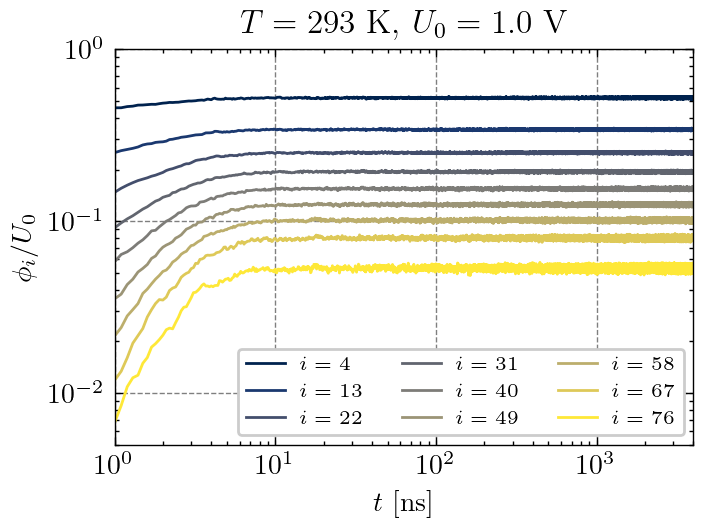

In [256]:
fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot()
N_vals  = [N_p//2+i*N_p for i in range(9)]
norm    = Normalize(vmin=min(N_vals), vmax=max(N_vals))

for i in N_vals:
    ax.plot(t_vals, pot_linear[f"{i}"].values/U_0_linear, label=f"$i = {i}$", color=cm(norm(i)))

ax.set_title(f"$T = 293$ K, $U_0 = {U_0_linear}$ V")
ax.set_xlim(1,4000)
ax.set_ylim(0.005,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("$\phi_i / U_0$")
ax.set_xlabel("$t$ [ns]")
ax.legend(ncol=3, fontsize='x-small')

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

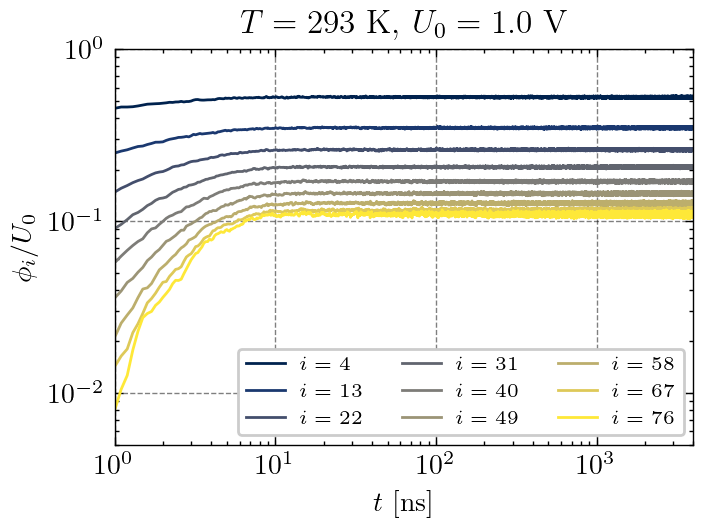

In [262]:
fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot()
N_vals  = [N_p//2+i*N_p for i in range(9)]
norm    = Normalize(vmin=min(N_vals), vmax=max(N_vals))

for i in N_vals:
    ax.plot(t_vals, pot_float_linear[f"{i}"].values/U_0_linear, label=f"$i = {i}$", color=cm(norm(i)))

ax.set_title(f"$T = 293$ K, $U_0 = {U_0_linear}$ V")
ax.set_xlim(1,4000)
ax.set_ylim(0.005,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("$\phi_i / U_0$")
ax.set_xlabel("$t$ [ns]")
ax.legend(ncol=3, fontsize='x-small')

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

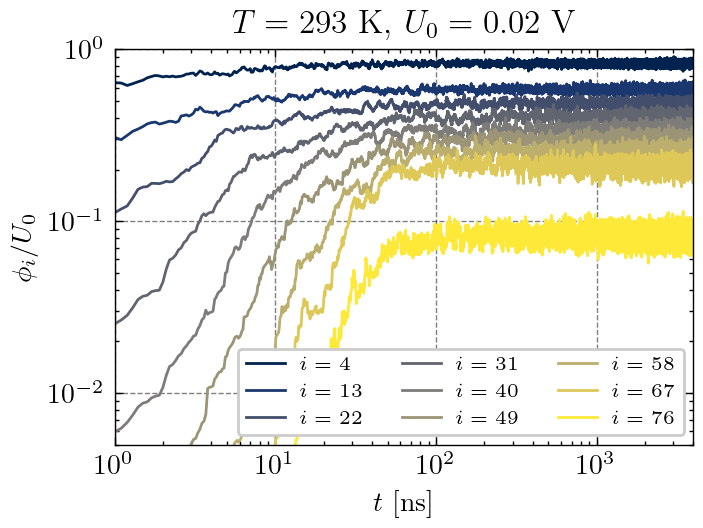

In [257]:
fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot()
N_vals  = [N_p//2+i*N_p for i in range(9)]
norm    = Normalize(vmin=min(N_vals), vmax=max(N_vals))

for i in N_vals:
    ax.plot(t_vals, pot_nonlinear[f"{i}"].values/U_0_nonlinear, label=f"$i = {i}$", color=cm(norm(i)))

ax.set_title(f"$T = 293$ K, $U_0 = {U_0_nonlinear}$ V")
ax.set_xlim(1,4000)
ax.set_ylim(0.005,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("$\phi_i / U_0$")
ax.set_xlabel("$t$ [ns]")
ax.legend(ncol=3, fontsize='x-small')

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

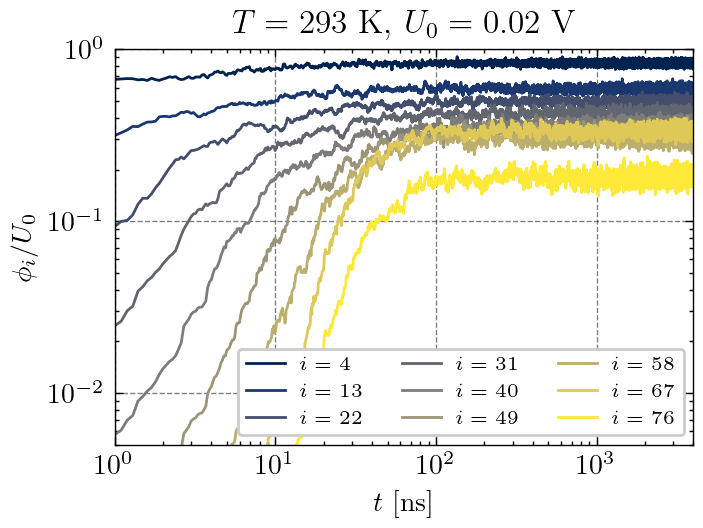

In [263]:
fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot()
N_vals  = [N_p//2+i*N_p for i in range(9)]
norm    = Normalize(vmin=min(N_vals), vmax=max(N_vals))

for i in N_vals:
    ax.plot(t_vals, pot_float_nonlinear[f"{i}"].values/U_0_nonlinear, label=f"$i = {i}$", color=cm(norm(i)))

ax.set_title(f"$T = 293$ K, $U_0 = {U_0_nonlinear}$ V")
ax.set_xlim(1,4000)
ax.set_ylim(0.005,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("$\phi_i / U_0$")
ax.set_xlabel("$t$ [ns]")
ax.legend(ncol=3, fontsize='x-small')

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

Text(42.06756469338072, 0.5, '$j$')

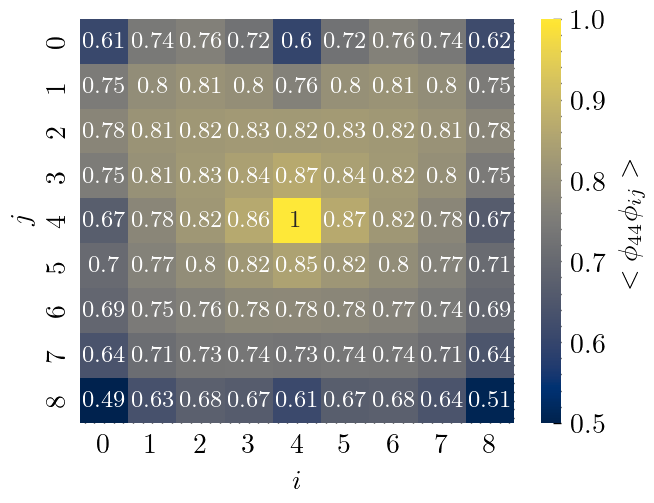

In [271]:
p_corrs = pot_linear.corr().iloc[N_p*N_p//2].values.reshape(N_p,-1)
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
ax      = sns.heatmap(p_corrs, cmap='cividis', vmin=0.5, vmax=1, ax=ax, cbar_kws={"label":"$<\phi_{44}\phi_{ij}>$"},
                      annot=True, annot_kws={'size':'small'})
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

Text(42.06756469338072, 0.5, '$j$')

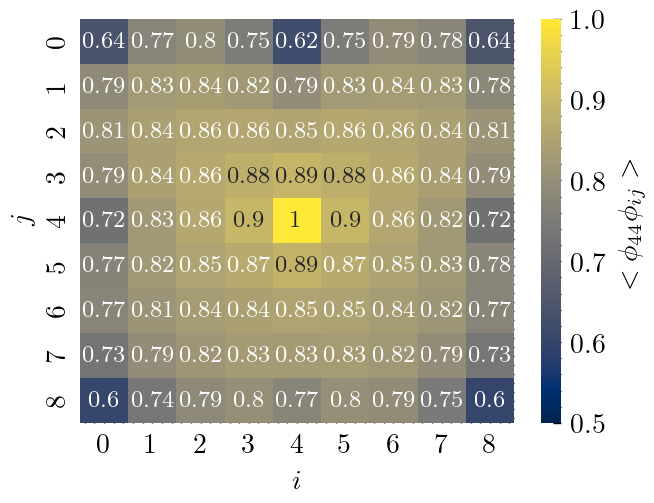

In [273]:
p_corrs = pot_float_linear.corr().iloc[N_p*N_p//2].values.reshape(N_p,-1)
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
ax      = sns.heatmap(p_corrs, cmap='cividis', vmin=0.5, vmax=1, ax=ax, cbar_kws={"label":"$<\phi_{44}\phi_{ij}>$"},
                      annot=True, annot_kws={'size':'small'})
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

Text(42.06756469338072, 0.5, '$j$')

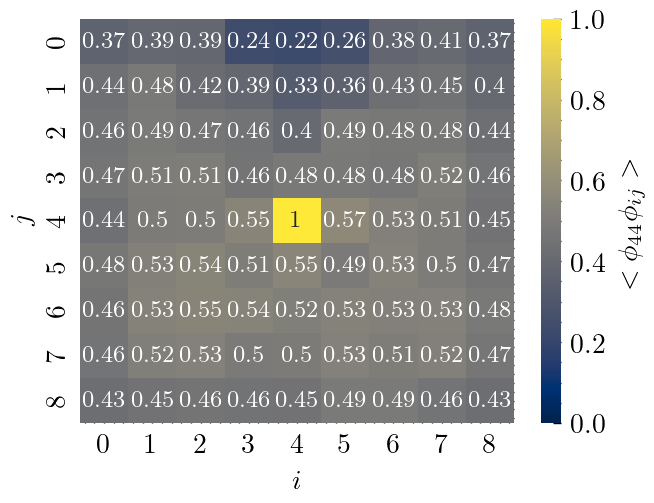

In [275]:
p_corrs = pot_nonlinear.corr().iloc[N_p*N_p//2].values.reshape(N_p,-1)
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
ax      = sns.heatmap(p_corrs, cmap='cividis', vmin=0.0, vmax=1, ax=ax, cbar_kws={"label":"$<\phi_{44}\phi_{ij}>$"},
                      annot=True, annot_kws={'size':'small'})
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

Text(42.06756469338072, 0.5, '$j$')

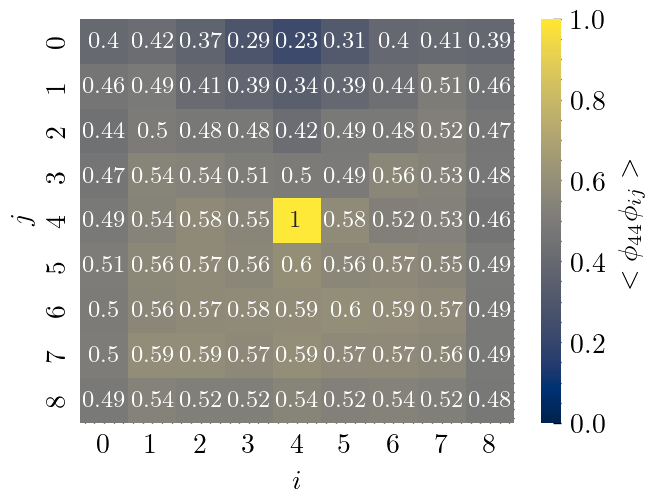

In [276]:
p_corrs = pot_float_nonlinear.corr().iloc[N_p*N_p//2].values.reshape(N_p,-1)
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
ax      = sns.heatmap(p_corrs, cmap='cividis', vmin=0, vmax=1, ax=ax, cbar_kws={"label":"$<\phi_{44}\phi_{ij}>$"},
                      annot=True, annot_kws={'size':'small'})
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

In [204]:
def characteristic_time_saturation(t_vals, pot_df, Np):

    def saturation_cuve(t, tau, a0):
        return a0*(1 - np.exp(-(t) / tau))

    tau = []
    std = []
    for i in range(Np):
        x       = t_vals.copy()
        y       = pot_df.loc[:,f'{i}'].values
        p, cov  = curve_fit(saturation_cuve, x, y, bounds=((0,0),(np.inf,np.inf)))
        tau.append(p[0])
        std.append(np.sqrt(cov[0,0]))

    return tau, std

def characteristic_time_stretched_saturation(t_vals, pot_df, Np, p0=None, bounds=(-np.inf,np.inf)):

    def stretched_saturation_curve(t, tau, a0, beta):
        return a0*(1 - np.exp(-((t/tau)**beta)))

    tau     = []
    params  = []
    for i in range(Np):
        x       = t_vals.copy()
        y       = pot_df.loc[:,f'{i}'].values
        p, _    = curve_fit(stretched_saturation_curve, x, y, p0=p0, bounds=bounds, maxfev=1000)
        tau_val = gamma(1/p[2])*p[0]/p[2]
        tau.append(tau_val)
        params.append(p)

    return tau, params

In [208]:
Np                          = int(N_p*N_p)
taus_linear, params_linear  = characteristic_time_stretched_saturation(t_vals, pot_linear, Np,
                                                                       p0=[3.0,U_0_linear,1.0],
                                                                       bounds=((0.1,0.0,0.3),(4.0,1.0,1.8)))

Text(42.06756469338072, 0.5, '$j$')

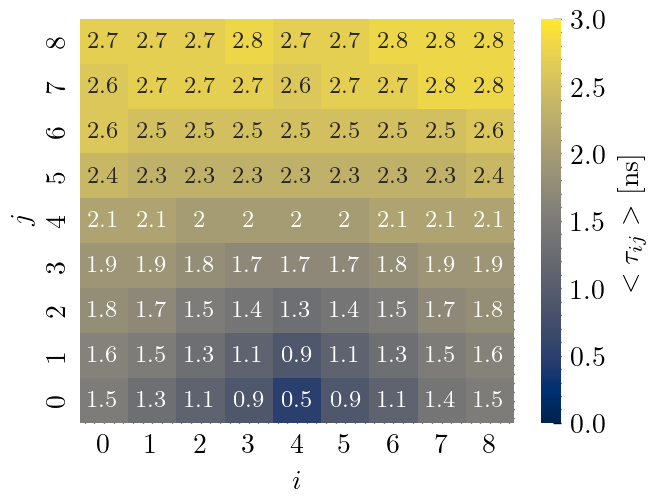

In [294]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax  = sns.heatmap(np.round(np.array(taus_linear).reshape(N_p,-1),1), cmap='cividis', vmin=0, vmax=3, ax=ax,
                  cbar_kws={"label":"$<\\tau_{ij}>$ [ns]"}, annot=True, annot_kws={'size':'small'})
ax.invert_yaxis()
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

In [280]:
Np                                      = int(N_p*N_p)
taus_float_linear, params_float_linear  = characteristic_time_stretched_saturation(t_vals, pot_float_linear, Np,
                                                                       p0=[3.0,U_0_linear,1.0],
                                                                       bounds=((0.1,0.0,0.3),(4.0,1.0,1.8)))

Text(42.06756469338072, 0.5, '$j$')

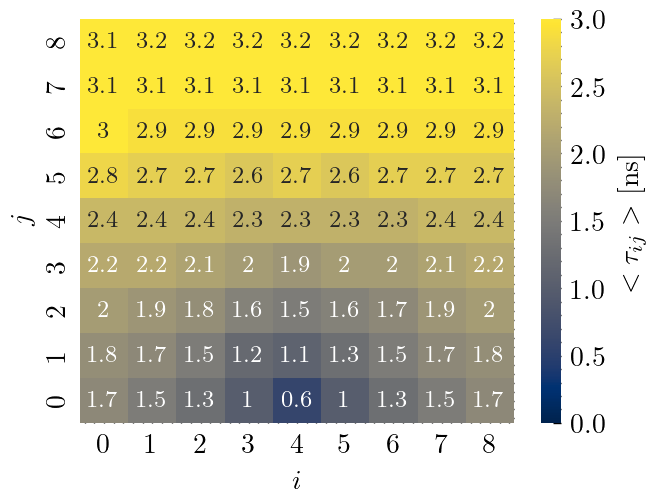

In [293]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax  = sns.heatmap(np.round(np.array(taus_float_linear).reshape(N_p,-1),1), cmap='cividis', vmin=0, vmax=3, ax=ax,
                  cbar_kws={"label":"$<\\tau_{ij}>$ [ns]"}, annot=True, annot_kws={'size':'small'})
ax.invert_yaxis()
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

In [229]:
Np                                  = int(N_p*N_p)
taus_nonlinear, params_nonlinear    = characteristic_time_stretched_saturation(t_vals, pot_nonlinear, Np,
                                                                               p0=[3.0,0.02,1.0],
                                                                               bounds=((0.0,0.0,0.2),(55.0,0.02,3.0)))

Text(42.06756469338072, 0.5, '$j$')

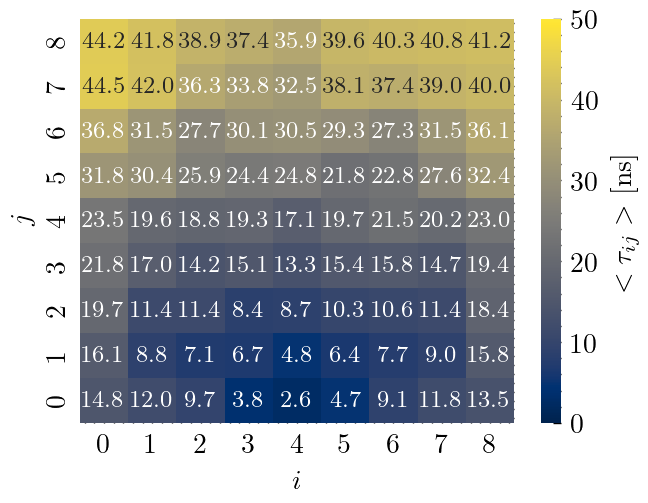

In [292]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax  = sns.heatmap(np.round(np.array(taus_nonlinear).reshape(N_p,-1),1), cmap='cividis', vmin=0, vmax=50, ax=ax,
                  cbar_kws={"label":"$<\\tau_{ij}>$ [ns]"}, annot=True, fmt='.1f', annot_kws={'size':'small'})
ax.invert_yaxis()
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

In [240]:
Np                                              = int(N_p*N_p)
taus_float_nonlinear, params_float_nonlinear    = characteristic_time_stretched_saturation(t_vals, pot_nonlinear, Np,
                                                                                            p0=[0.1,0.02,1.0],
                                                                                            bounds=((0.0,0.0,0.2),(55.0,0.02,3.0)))

Text(42.06756469338072, 0.5, '$j$')

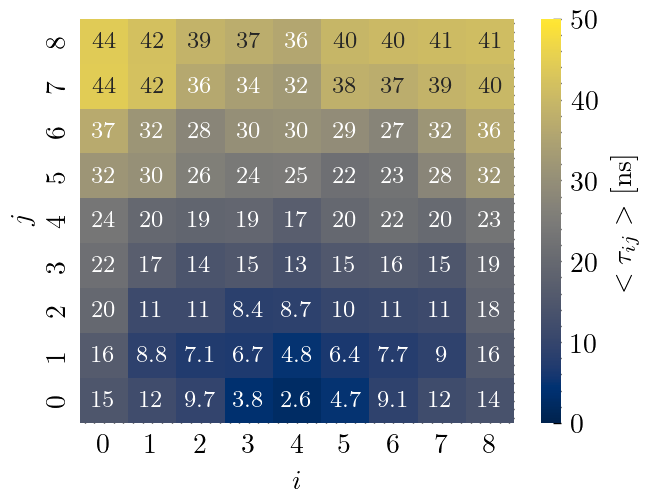

In [291]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax  = sns.heatmap(np.round(np.array(taus_float_nonlinear).reshape(N_p,-1),1), cmap='cividis', vmin=0, vmax=50, ax=ax,
                  cbar_kws={"label":"$<\\tau_{ij}>$ [ns]"}, annot=True, annot_kws={'size':'small'})
ax.invert_yaxis()
ax.set_xlabel("$i$")
ax.set_ylabel("$j$")

In [172]:
# fig     = plt.figure(dpi=200, layout='constrained')
# ax      = fig.add_subplot()
# N_vals  = [N_p//2+i*N_p for i in range(9)]
# norm    = Normalize(vmin=0, vmax=len(N_vals)-1)
# pot_dif = pot_float_nonlinear[[f"{i}" for i in N_vals]]
# pot_dif = pot_dif.diff(axis=1).dropna(axis=1)
# pot_dif = np.insert(pot_dif, 0, np.zeros(len(N_vals)-1), axis=0)

# for i in range(pot_dif.shape[1]):
#     ax.plot(t_vals, pot_dif[:-1,i]/U_0_nonlinear, label=f"$i = {i}$", color=cm(norm(i)))

# # ax.set_title(f"$T = 293$ K, $U_0 = {U_0}$ V")
# # ax.set_xlim(1,4000)
# # ax.set_ylim(0.005,1)
# # ax.set_xscale('log')
# # ax.set_yscale('log')
# # ax.set_ylabel("$\phi_i / U_0$")
# # ax.set_xlabel("$t$ [ns]")
# # ax.legend(ncol=3, fontsize='x-small')
# ax.set_xlim(-1,2000)
# ax.set_ylabel("$\Delta \phi_i(t) / U_0$")
# ax.set_xlabel("$t$ [ns]")

# # fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

---